# Tutorial 10 - Neural Networks (NN): 


A Neural Network is a computational model for approximating complex functions by composing basic units termed “neurons”. <br>
Each neuron is a simple computational unit that for a given input calculates a weighted sum (+ a bias) of it, and applies some (non-linear) "activation function" to create the final output. <br>
output = activation( wᵀx + b)<br><br>
This basic model can be stacked in layers - where each output passes on to a second neuron (and so on) to refine and recombine features from the previous one - ultimately capturing intricate relationships in data far beyond linear decision boundaries. <br>
You could say that at its core, a neural network is a parameterized complex function made of layered units that adjust their weights via data-driven training, allowing the model to approximate complex, non-linear patterns that simple classifiers can’t.

### Motivation for Neural Networks

Oh so many, but let's see how it compares to pervious learned models.

**How can we learn non-linear separators (or regressors)?**

**Idea 1**:  Transform to a space where the data is linearly separable

1. Manual *feature engineering* : add x1**2, x1*x2, log(1+x1), XOR(x1, x2)
1. Automate with basis functions (e.g. polynomial regression)
1. Automate with kernel trick and non-linear Support Vector Machines

These methods rely on predetermined transformations, and as such may be inflexible, computationally heavy, or require strong prior assumptions about which features help.

**Idea 2**:  Combine classifiers (Ensembles)

1. Linearly combine trees (bagging --> RandomForest, boosting --> XGBoost)

These are highly flexible models but often with less interpretability and requiring many (non-linear) base learners.

**Idea 3**: Using Neural networks!
1. Instead of predetermined transformations, a neural network learns non-linear transformations of inputs (hidden-layer activations) directly from data.
2. A single hidden layer learns one level of features; deeper networks stack multiple layers so that later layers build on earlier features, capturing hierarchical patterns. This hierarchy yields greater expressivity with fewer total parameters.



So actually, **NN generalizes GLMs and ensembles**:
1. A GLM (e.g., logistic regression) is a 1-layer NN (one linear transform + activation).
2. A deeper NN stacks layers, akin to “GLM on GLM outputs” but trained end-to-end for better feature discovery and synergy between layers.
3. Unlike fixed basis expansions or kernel SVMs, NNs adapt feature maps during training.



## Perceptron & Multi-Layered Perceptron (MLP)

<div dir=rtl>    
</div>

<div dir=rtl>
    בתרגול זה נכיר מודל אחד של רשת נוירונים - מודל פרספטרון רב שכבתי. נראה תחילה דוגמה לרשת כזו המכילה אינפוט בגודל 4, שכבה חבויה אחת עם חמישה נוירונים ושכבת אאוטפוט עם נוירון אחד:
</div>

![](https://www.kdnuggets.com/wp-content/uploads/strika-1-fig_neural_network_1.png)

<div dir=rtl>
    לפני שנבין מה הרשת עושה, נתמקד תחילה באבן היסוד שלה - הפרספטרון:
</div>

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*Ib3_FfuOy04kOmfO)

<div dir=rtl>
    הפרספטרון הוא למעשה פונקציה המכילה פרמטרים. בהינתן אינפוט, הפרספטרון כופל את הפרמטרים באינפוטים, סוכם, מחיל פונקציה כלשהי על התוצאה ופולט מספר אחד ויחיד בתור פלט:
</div>

\begin{align}
\Sigma = x_1 \cdot w_1 + x_2 \cdot w_2 + b \\
f(x) = \sigma (x) \\
output = \sigma(\Sigma)\\ \\
\Sigma < 0 \rightarrow output = 0 \\ 
\Sigma >= 0 \rightarrow output = 1
\end{align}

<div dir=rtl>
במקרה הזה השתמשנו בפונקציית מדרגה בתור פונקציית האקטיבציה. אבל באותה מידה יכולנו להשתמש בפונקציית הסיגמואיד למשל. במצב זה, הנוירון יצביע על הסתברות גדולה מחצי אם תוצאת הסכימה גדולה מ0, ועל הסתברות קטנה מחצי אם תוצאת הסכימה קטנה מאפס.
    <br />
    נשמע מוכר? זה בדיוק המשוואות של רגרסיה לוגיסטית.
</div>



## <div dir=rtl> שאלה 1</div>
<div dir=rtl>
  הדגימי לימוד משטח הפרדה לא ליניארי בעזרת רשת נוירונים מינימאליסטית, 

  בדומה ל - https://playground.tensorflow.org/
  
  (מומלץ בחום! תנסו לשחק עם זה, להפריד את השבלול ולבדוק השפעה של רגולריזצייה)
</div>

מחברת מפורטת בה נעזרנו -  מומלצת להעמקה עצמאית   - עוברת על הכל בצעדים קטנים: 

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb

אנחנו נעשה טיפה יותר דחוס בהתאם לאילוצים

<div dir=rtl>
    נתחיל בלג'נרט קצת דאטא לא פריד לינארית
</div>

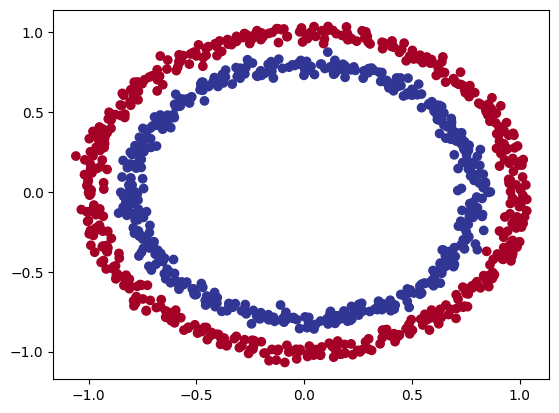

In [1]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.datasets import make_circles

X, y = make_circles(1000,            # total data points
                    noise=0.03,      # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

<div dir=rtl>
    נפצל לtrain/test
</div>

In [2]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn

# Technicality of torch: transforming into its preferred datatype ("Tensor")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

<div dir=rtl>
    עכשיו נבנה רשת שתנסה ללמוד משטח הפרדה לא לינארי עבור הדאטא! <br>
    לשם כך, נגדיר את השכבות שיהיו לנו ברשת ואת פונקציית הloss שלנו.

    מבחינת פונקציית הloss, נבחר בפונקציית Binary Cross-entropy (שזה בגדול Cross-entropy רק עבור שתי מחלקות). 


שימו לב שהפונקצייה מצפה לקבל ערכים בין 0 ל1. על כן או שנקבל את זה כמו שזה מהרשת, או שנכניס בעצמנו שכבת סיגמואיד
</div>

\begin{align}
Cross-entropy \ Loss= -\sum_i{y_ilog\hat{y}} \\
(or \ for \ on-hot \ encoding): L=-log\hat{y_c} \ where \ c \ is \ the \ true \ class
\end{align}

In [3]:
# Create a model and a loss function

def create_model_and_loss(layers, sigmoid_in_model = False):
    """ handling the toch nuance in one place to ensure consistency
        (out effort to support of the two equivalent formulations completely optional, 
         in practice just choose and run with one)
    """
    # BCELoss: no sigmoid built-in (expects [0, 1] output of network ending with sigmoid)
    # BCEWithLogitsLoss: sigmoid layer built-in (expects logit from network w.o. sigmoid)
    if sigmoid_in_model:
        layers.append(nn.Sigmoid())
        loss_fn = nn.BCELoss() 
    else:
        loss_fn = nn.BCEWithLogitsLoss()

    return nn.Sequential(*layers), loss_fn

layers = [
    nn.Linear(in_features=2, out_features=5), # takes in 2 features (X), produces 5 features
    nn.Linear(in_features=5, out_features=1), # takes in 5 features, produces 1 feature (y)
]

model_0, loss_fn = create_model_and_loss(layers)

<div dir=rtl>
עכשיו נעבור לאימון הרשת. שימו לב לשני הפרמטרים הנוספים שהפונקציה יודעת לקבל. (מעניין, שאלה קלאסית למבחן?) <br>
lr - קצב הלימוד, יקבע כמה אני מאפשר לפרמטרים של המודל להשתנות בכל איטרציה של האימון (שלב עדכון גראדיאנט). ניתן לחשוב על זה כ"גודל הצעד" במורד (או מעלה) הגארדיאנט כאשר אני ממזער את פונקציית הloss שלי. קצב זה יקבע בפועל כמה מהר המודל "ילמד" את הדאטא (וכמה יציב הוא יהיה). <br>


![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

epochs - כל epoch הוא מעבר אחד "שלם" על כל הtraining dataset באימון. כמות epchoים קטנה מידי תביא לunderfit, אבל יותר מידי epcohים יביאו לoverfit.

![](https://images.deepai.org/glossary-terms/a6ce4afd98614baa96a4be88ce10144d/epoch.png)

שימו לב! כאשר נדבר על Batchים תתווסף לנו הגדרה נוספת - iterations, שתיהיה שונה מ (ותשנה את) epochs
</div>

In [28]:

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

def train(model, loss_fn, lr=0.1, epochs=1000, sigmoid_in_model=False):
    """ Simple training and evaluation loop for a BINARY classifier
        NOTE: batch size equals training set size aka one step per epoch

        Args:
        lr:  learning rate
        epochs:  numer of times we "pass" over the data
    """
    
    # Create an optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        ### Training
        model.train()  # set in train mode

        # 1. Forward pass 
        if sigmoid_in_model:
            model_out = probs = model(X_train).squeeze() 
            # squeeze to remove extra `1` dimensions,
        else:
            model_out = y_logits = model(X_train).squeeze()
            probs = torch.sigmoid(y_logits)
        # NOTE round turns the probability into "hard" prediction (th=.5)
        y_pred = torch.round(probs) 
    
        # 2. Calculate loss/accuracy        
        acc = accuracy_fn(y_true=y_train, y_pred=y_pred) 

        loss = loss_fn(model_out, y_train) 
        optimizer.zero_grad()

        # 3. Backpropagation! 
        loss.backward()

        # 4. Apply gradient step to weights!
        optimizer.step()

        ### Testing
        model.eval()  # set in evaluation mode mode
        with torch.inference_mode():
            # 1. Forward pass
            if sigmoid_in_model:
                model_out = probs = model(X_test).squeeze() 
            else:
                model_out = y_logits = model(X_test).squeeze()
                probs = torch.sigmoid(y_logits)
            # NOTE round turns the probability into "hard" prediction (th=.5)
            test_pred = torch.round(probs) 

            # 2. Caculate loss/accuracy
            test_loss = loss_fn(model_out, y_test)
            test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

    return model

model = train(model_0, loss_fn)

Epoch: 0 | Loss: 0.72174, Accuracy: 50.00% | Test loss: 0.71875, Test acc: 50.00%
Epoch: 100 | Loss: 0.69345, Accuracy: 50.25% | Test loss: 0.69514, Test acc: 51.50%
Epoch: 200 | Loss: 0.69310, Accuracy: 50.62% | Test loss: 0.69511, Test acc: 47.00%
Epoch: 300 | Loss: 0.69301, Accuracy: 50.75% | Test loss: 0.69491, Test acc: 46.50%
Epoch: 400 | Loss: 0.69299, Accuracy: 51.00% | Test loss: 0.69480, Test acc: 47.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69474, Test acc: 46.50%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69471, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69470, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69469, Test acc: 44.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69468, Test acc: 45.00%


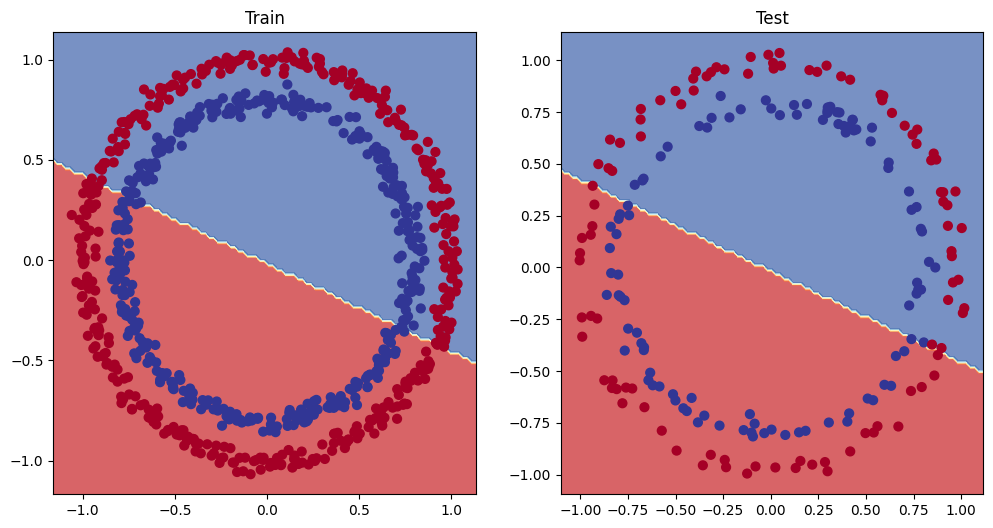

In [29]:
from helper_functions import plot_predictions, plot_decision_boundary

def visualize(model):
    """ Plot decision boundaries for training and test sets """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, X_test, y_test)

visualize(model)

<div dir=rtl>
    איזה באסה, נראה שלא הצליח לנו. אז למה בכלל רצינו רשתות? לא נראה שזה באמת פועל. <br>
    אבל האם? מה שכחנו בהגדרת הרשת למעלה? בואו ננסה שוב
</div>

Epoch: 0 | Loss: 0.69850, Accuracy: 52.00% | Test loss: 0.69575, Test acc: 52.00%
Epoch: 100 | Loss: 0.69149, Accuracy: 50.12% | Test loss: 0.69021, Test acc: 51.00%
Epoch: 200 | Loss: 0.68836, Accuracy: 51.00% | Test loss: 0.68752, Test acc: 54.00%
Epoch: 300 | Loss: 0.68512, Accuracy: 51.50% | Test loss: 0.68467, Test acc: 54.50%
Epoch: 400 | Loss: 0.68151, Accuracy: 52.62% | Test loss: 0.68143, Test acc: 55.00%
Epoch: 500 | Loss: 0.67727, Accuracy: 54.12% | Test loss: 0.67765, Test acc: 55.50%
Epoch: 600 | Loss: 0.67221, Accuracy: 58.13% | Test loss: 0.67328, Test acc: 59.50%
Epoch: 700 | Loss: 0.66588, Accuracy: 61.75% | Test loss: 0.66781, Test acc: 63.00%
Epoch: 800 | Loss: 0.65794, Accuracy: 72.38% | Test loss: 0.66109, Test acc: 71.00%
Epoch: 900 | Loss: 0.64768, Accuracy: 80.38% | Test loss: 0.65330, Test acc: 77.50%
Epoch: 1000 | Loss: 0.63484, Accuracy: 88.50% | Test loss: 0.64463, Test acc: 83.50%
Epoch: 1100 | Loss: 0.61987, Accuracy: 87.12% | Test loss: 0.63416, Test acc:

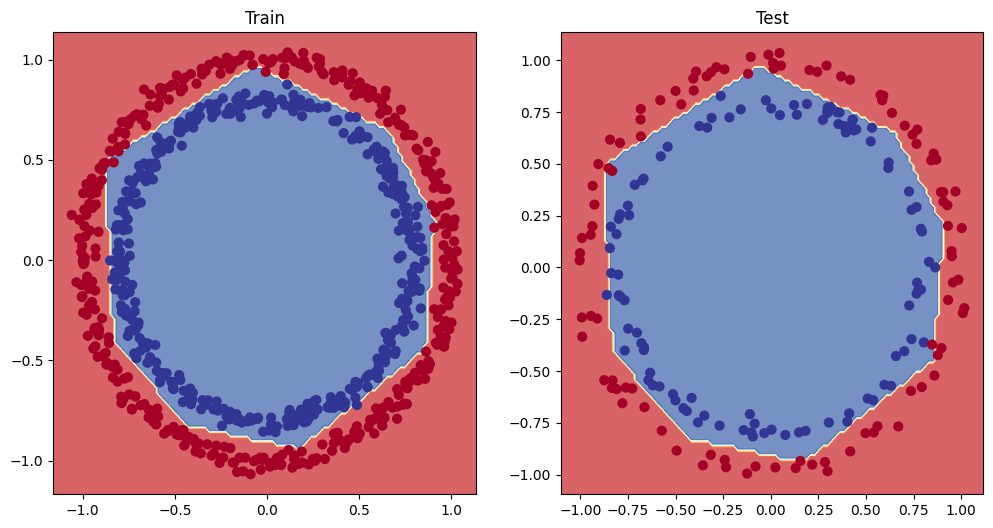

In [30]:
hidden_layer_width = 7 
 
# TODO try more neurons and/or more layers

layers = [
    nn.Linear(in_features=2, out_features=hidden_layer_width),
    nn.ReLU(), # !! # TODO try more hidden
    # nn.Linear(in_features=hidden_layer_width, out_features=hidden_layer_width),
    # nn.ReLU(),
    nn.Linear(in_features=hidden_layer_width, out_features=1)
]

model_1, loss_fn = create_model_and_loss(layers)

model = train(model_1, loss_fn, lr=0.1, epochs=3000)
visualize(model)

<div dir=rtl>
 
 מצוין!
</div>

---


## <div dir=rtl> שאלה 2</div>


<div dir=rtl>
בואו ננסה עכשיו לעשות  multi-class classification
</div>

<div dir=rtl>
    ניצור דאטא עם 4 מחלקות שונות
</div>

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


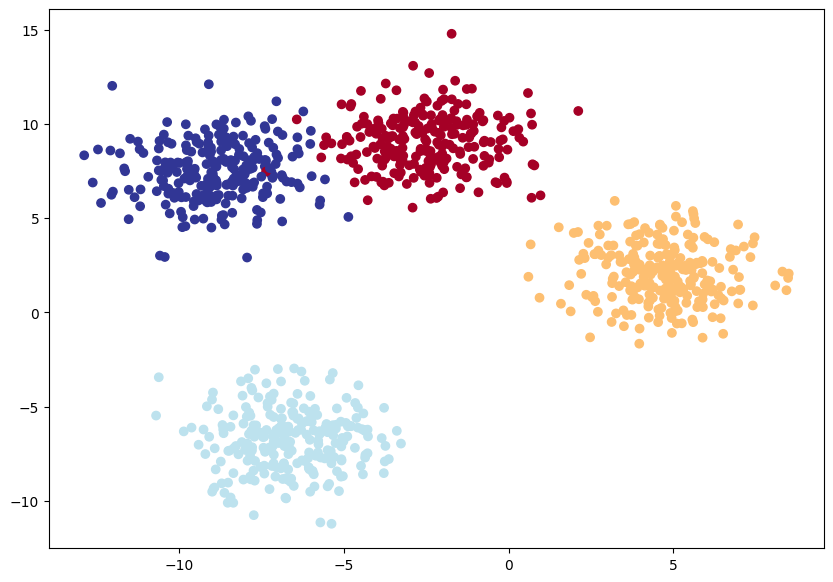

In [8]:
from sklearn.datasets import make_blobs

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = \
train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

<div dir=rtl>
    נבצע שוב אימון. שימו לב - מי הloss פה? <br>
    אנחנו שוב נשתמש בCE - אבל הפעם עבור multiclass. <br>
    בניגוד למקרה הקודם - הloss שלנו לא יפעיל sigmoid לפני חישוב הloss, אלא ישתמש בפונקציית softmax
</div>

The Softmax function:
For a vector z=[z1,...zk] the softmax outputs a vector of probabilities p=[p1,...,pk] <br>
where:

\begin{align}
softmax(z)_i = \frac{e^{z_i}}{\sum^k_{j=1}{e^{z_j}}} = p_i \\ 

p_i \in (0,1), \sum^k_{j=1}{e^{z_j}} = 1
\end{align}

This can be Interpreted as a categorical distribution over K classes.

In this case, out loss will be

\begin{align}
L_{CE} (z,i) = -log{p_t} = -log{\frac{e^{z_i}}{\sum^k_{j=1}{e^{z_j}}}}
\end{align}

| Aspect                          | Sigmoid (binary/multi-label)                                               | Softmax (multiclass)                                          |
| ------------------------------- | -------------------------------------------------------------------------- | ------------------------------------------------------------- |
| Activation for logit $z_i$      | $\sigma(z_i) = \dfrac{1}{1+e^{-z_i}}$                                      | $p_i = \dfrac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}$             |
| Output range                    | Each $\sigma(z_i)\in (0,1)$ independently                                  | $p_i\in(0,1)$ and $\sum_{i=1}^K p_i = 1$                      |
| Loss for true label(s)          | Binary CE per unit: $-[y_i \log \sigma(z_i) + (1-y_i)\log(1-\sigma(z_i))]$ | Categorical CE: $-\log p_{t}$ for true index $t$              |
| Use-case                        | Binary classification or multi-label (non-exclusive)                       | Multiclass classification (exactly one class per example)     |


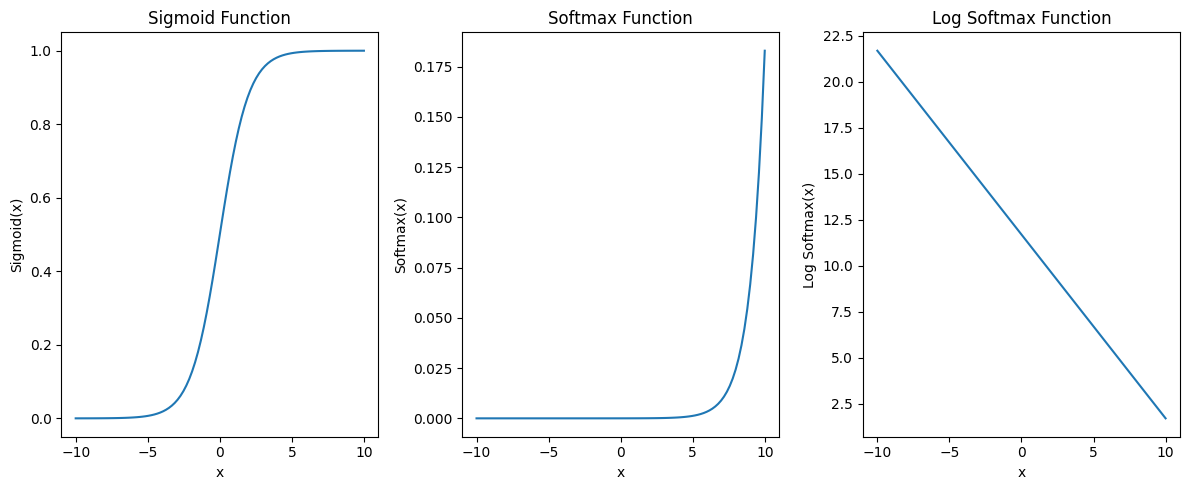

In [15]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
softmax = np.exp(x) / np.sum(np.exp(x), axis=0)
log_softmax = -np.log(softmax)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Sigmoid Function")
plt.plot(x, sigmoid)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")

plt.subplot(1, 3, 2)
plt.title("Softmax Function")
plt.plot(x, softmax)
plt.xlabel("x")
plt.ylabel("Softmax(x)")

plt.subplot(1, 3, 3)
plt.title("Log Softmax Function")
plt.plot(x, log_softmax)
plt.xlabel("x")
plt.ylabel("Log Softmax(x)")

plt.tight_layout()
plt.show()


<div dir=rtl>
שאלת דמה במבחן - למה נרצה את התנאי על הסכום? <br>
תשובה - בבעיית multiclass אנו יוצאים מנקודת הנחה שכל המחלקות שלנו mutally exclusive. אם כך, המחלקות "ממלאות" לי את כל ההתפלגות. לכן נצפה שסכום ההסתברויות יהיה בדיוק 1 (במאה אחוז מהמקרים אני אסווג לאחת מהמחלקות הנתונות)
</div>

<div dir=rtl>
    נחזור לאימון
</div>

In [9]:

def train(model, 
          X_train, y_train, X_test, y_test,
          loss_fn=nn.CrossEntropyLoss(), lr=0.1, epochs=1000):
    """ Simple training and evaluation loop for a MULTICLASS classifier
        NOTE: batch size equals training set size aka one step per epoch

        Args:
        lr:  learning rate
        epochs:  numer of times we "pass" over the data
    """
    
    # Create an optimizer
    optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        ### Training ###
        model.train()  # set in train mode

        # 1. Forward pass 
        model_out = train_logits = model(X_train).squeeze()
        # probs = torch.sigmoid(train_logits)    # binary
        # train_pred = torch.round(train_logits) # binary
        """ BINARY --> MULTICLASS:  
        (A) sigmoid --> softmax 
        (B) round(p(1)) --> argmax(p=[p0,p1,p2,..])  ({0,1} --> indices)
        """
        train_probs = torch.softmax(train_logits, dim=1)
        y_train_pred = train_probs.argmax(dim=1)
        
        # 2. Calculate loss/accuracy        
        acc = accuracy_fn(y_true=y_train, y_pred=y_train_pred) 

        loss = loss_fn(model_out, y_train) 
        optimizer.zero_grad()

        # 3. Backpropagation! 
        loss.backward()

        # 4. Apply gradient step to weights!
        optimizer.step()

        ### Testing
        model.eval()  # set in evaluation mode mode
        with torch.inference_mode():
            # 1. Forward pass
            model_out = test_logits = model(X_test).squeeze()
            
            # probs = torch.sigmoid(y_logits) # binary            
            # test_pred = torch.round(probs)  # binary
            """ BINARY --> MULTICLASS:  
            (A) sigmoid --> softmax 
            (B) round(p(1)) --> argmax(p=[p0,p1,p2,..])  ({0,1} --> indices)
            """
            test_probs = torch.softmax(test_logits, dim=1)
            # TODO can we skip the softmax here? 
            test_pred = test_probs.argmax(dim=1)

            # 2. Caculate loss/accuracy
            test_loss = loss_fn(model_out, y_test)
            test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

    return model

model_mc = nn.Sequential(nn.Linear(in_features=NUM_FEATURES, out_features=hidden_layer_width),
                         nn.ReLU(),
                         nn.Linear(in_features=hidden_layer_width, out_features=hidden_layer_width),
                         nn.ReLU(),
                         nn.Linear(in_features=hidden_layer_width, out_features=NUM_CLASSES))
# TODO do we need sigmoid or softmax?
# TODO can we reduce number of layers? maybe WITHOUT hidden layers?

model = train(model_mc, X_blob_train, y_blob_train, X_blob_test, y_blob_test)

Epoch: 0 | Loss: 1.25531, Accuracy: 31.50% | Test loss: 0.92151, Test acc: 45.00%
Epoch: 100 | Loss: 0.27110, Accuracy: 99.12% | Test loss: 0.23082, Test acc: 99.00%
Epoch: 200 | Loss: 0.12103, Accuracy: 99.25% | Test loss: 0.09583, Test acc: 99.50%
Epoch: 300 | Loss: 0.07749, Accuracy: 99.38% | Test loss: 0.05829, Test acc: 99.50%
Epoch: 400 | Loss: 0.05909, Accuracy: 99.38% | Test loss: 0.04243, Test acc: 99.50%
Epoch: 500 | Loss: 0.04934, Accuracy: 99.38% | Test loss: 0.03403, Test acc: 99.50%
Epoch: 600 | Loss: 0.04327, Accuracy: 99.38% | Test loss: 0.02892, Test acc: 99.50%
Epoch: 700 | Loss: 0.03252, Accuracy: 99.38% | Test loss: 0.02002, Test acc: 99.50%
Epoch: 800 | Loss: 0.02648, Accuracy: 99.38% | Test loss: 0.01487, Test acc: 99.50%
Epoch: 900 | Loss: 0.02438, Accuracy: 99.50% | Test loss: 0.01304, Test acc: 99.50%


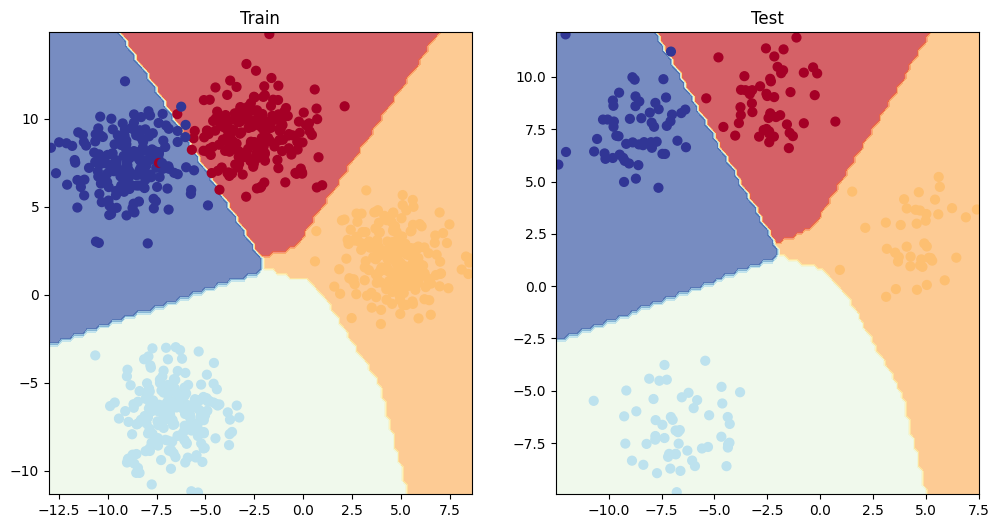

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_mc, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_mc, X_blob_test, y_blob_test)

---------------

## <div dir=rtl> שאלה ממבחן - 2024 מועד א' שאלה 3</div>

<div dir=rtl>

![alt text](test_q.png)    

</div>
